[Train data](https://github.com/zinduaschool/0205-boston-housing-project---regression-Mugambi99/blob/main/train.csv)

[Test data](https://github.com/zinduaschool/0205-boston-housing-project---regression-Mugambi99/blob/main/test.csv)

[Data Information](https://github.com/zinduaschool/0205-boston-housing-project---regression-Mugambi99/blob/main/data_description.txt)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import seaborn as sns

In [78]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [79]:
data= pd.read_csv("https://raw.githubusercontent.com/zinduaschool/0205-boston-housing-project---regression-Mugambi99/main/train.csv?token=GHSAT0AAAAAAB46X4VEG2TWLIA7T6AI7YUGZCIAR5Q")

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
data.shape

(1460, 81)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [82]:
# change the column names to lower case 
data.columns=map(str.lower,data.columns)

### Exploring the Missing Values 

In [83]:
missing_data= data.isna().sum().sort_values(ascending=False)
percent=data.isnull().sum().sort_values(ascending=False)/data.isnull().count().sort_values(ascending=False)

df_missing=pd.concat([missing_data,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
df_missing.index.name='variable'# set the index name to variable 
df_missing = df_missing[df_missing['total_missing'] > 0] # only retain those with missing values 
df_missing['percentage_missing']=df_missing['percentage_missing']*100 # convert to percentage
df_missing

,total_missing,percentage_missing
variable,,
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garageyrblt,81,5.547945
garagecond,81,5.547945
garagetype,81,5.547945


### Exploring Categorical Data

In [84]:
## get their names first 
categorical=data.select_dtypes(include=[np.object])
categorical.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_13820/2768675453.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=data.select_dtypes(include=[np.object])


,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Exploring the numerical variables

In [85]:
numerical=data.select_dtypes(include=[np.number])
numerical.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [86]:
#missing values in numerical variables 
# missing_df_resetted[missing_df_resetted['variable'].isin(numerical.columns)]

### Handling the missing data

**What we are going to do is assign "NONE" to Categorical data and Get the mean to the Numerical data**

***Numerical data***

In [87]:
for var in ['lotfrontage','garageyrblt','masvnrarea']:
    data[var]=data[var].fillna(data[var].mode()[0])

***Categorical data***

In [88]:
for var in ['alley','miscfeature','poolqc','fence','fireplacequ','garagecond','garagequal',
            'garagefinish','garagetype','bsmtfintype2','bsmtfintype1','bsmtqual','bsmtcond','bsmtexposure','masvnrtype','electrical']:
    data[var]=data[var].fillna('None')

***Checking for the null values***

In [89]:
data.isna().sum().sort_values(ascending=False)

id               0
centralair       0
garageyrblt      0
garagetype       0
fireplacequ      0
fireplaces       0
functional       0
totrmsabvgrd     0
kitchenqual      0
kitchenabvgr     0
bedroomabvgr     0
halfbath         0
fullbath         0
bsmthalfbath     0
bsmtfullbath     0
grlivarea        0
lowqualfinsf     0
2ndflrsf         0
1stflrsf         0
garagefinish     0
garagecars       0
garagearea       0
poolqc           0
salecondition    0
saletype         0
yrsold           0
mosold           0
miscval          0
miscfeature      0
fence            0
poolarea         0
garagequal       0
screenporch      0
3ssnporch        0
enclosedporch    0
openporchsf      0
wooddecksf       0
paveddrive       0
garagecond       0
electrical       0
heatingqc        0
mssubclass       0
heating          0
overallcond      0
overallqual      0
housestyle       0
bldgtype         0
condition2       0
condition1       0
neighborhood     0
landslope        0
lotconfig        0
utilities   

### Detecting outliers 

In [90]:
# Calculate the IQR
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1

# print(IQR)

In [91]:
# Remove outliers
# data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [92]:
## bivaraite outlier analysis 
# for var in continous_df:
#     if not var=='id'and var!='saleprice':
#         sns.scatterplot(x=continous_df[var],y=continous_df['saleprice'])
#         plt.title(var.upper())
#         plt.show()

In [93]:
for var in ['alley','miscfeature','poolqc','fence','fireplacequ','garagecond','garagequal',
            'garagefinish','garagetype','bsmtfintype2','bsmtfintype1','bsmtqual','bsmtcond','bsmtexposure','masvnrtype','electrical']:
    print(data[var].value_counts())

None    1369
Grvl      50
Pave      41
Name: alley, dtype: int64
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: miscfeature, dtype: int64
None    1453
Gd         3
Ex         2
Fa         2
Name: poolqc, dtype: int64
None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: fence, dtype: int64
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: fireplacequ, dtype: int64
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: garagecond, dtype: int64
TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: garagequal, dtype: int64
Unf     605
RFn     422
Fin     352
None     81
Name: garagefinish, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: garagetype, dtype: int64
Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: bsmtfintype2, dtype: int64


In [94]:
# data= pd.get_dummies(data, columns=["mszoning",
# "street",
# "alley",
# "lotshape",
# "landcontour",
# "utilities",
# "lotconfig",
# "landslope",
# "neighborhood",
# "condition1",
# "condition2",
# "bldgtype",
# "housestyle",
# "roofstyle",
# "roofmatl",
# "exterior1st",
# "exterior2nd",
# "masvnrtype",
# "exterqual",
# "extercond",
# "foundation",
# "bsmtqual",
# "bsmtcond",
# "bsmtexposure",
# "bsmtfintype1",
# "bsmtfintype2",
# "heating",
# "heatingqc",
# "centralair",
# "electrical",
# "kitchenqual",
# "functional",
# "fireplacequ",
# "garagetype",
# "garagefinish",
# "garagequal",
# "garagecond",
# "paveddrive",
# "poolqc",
# "fence",
# "miscfeature",
# "saletype",
# "salecondition"])

In [96]:
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
CatVariables = data.select_dtypes(include=['object'])
for feature in CatVariables:
    data[feature] = le.fit_transform(data[feature].astype(str))

In [97]:
# This is to remove outliers 
from sklearn.ensemble import IsolationForest
anomalies = IsolationForest(contamination=0.05).fit_predict(data)
print('Rows with anomalies: ', np.where(anomalies))

data = data.drop(np.where(anomalies<1)[0])
data.shape

Rows with anomalies:  (array([   0,    1,    2, ..., 1457, 1458, 1459], dtype=int64),)


(1387, 81)

In [98]:
data.shape

(1387, 81)

In [99]:
X= data.drop(columns=["id", "saleprice"])
Y= data["saleprice"]

In [100]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X,Y, test_size=0.3, random_state=2)

In [101]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)

(970, 79)
(417, 79)
(970,)


In [102]:
lm= LinearRegression()

In [103]:
lm.fit(Xtrain, Ytrain)

LinearRegression()

### Model Evaluation

In [104]:
training_data= lm.predict(Xtrain)

In [105]:
error_score= r2_score(Ytrain, training_data)

In [106]:
print("R-square error:", error_score)
print("Root Mean Square Error:", sqrt(mean_squared_error(Ytrain, training_data)))

R-square error: 0.9078713372017008
Root Mean Square Error: 21719.667117255507


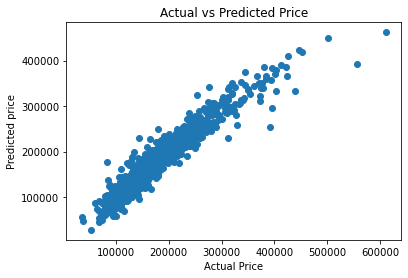

In [107]:
plt.scatter(Ytrain, training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()

In [108]:
test_data= lm.predict(Xtest)

In [109]:
error_score1= r2_score(Ytest, test_data)

In [110]:
print("R-square error:", error_score1)
print("Mean Square Error:", sqrt(mean_squared_error(Ytest, test_data)))

R-square error: 0.887191453708005
Mean Square Error: 24359.743393444736


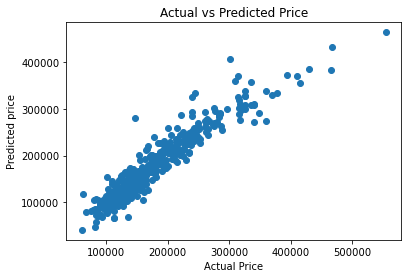

In [111]:
plt.scatter(Ytest, test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()

In [114]:
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso,Ridge
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),LinearRegression())
scores = cross_val_score(pipe, X, Y, cv=3, scoring='r2')

print(scores, scores.mean())

[0.42769663 0.63634244 0.75117185] 0.6050703082312827
